## House Prices - Advanced Regression Techniques Final
#### Predict sales prices and practice feature engineering, RFs, and gradient boosting

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation

### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Submission File Format
The file should contain a header and have the following format:

Id,SalePrice

1461,169000.1

1462,187724.1233

1463,175221

etc.

In [1]:
# Import the libraries

import pandas as pd
import numpy as np

import seaborn as sns 
import scipy.stats as stats
from scipy.stats import norm
!pip install researchpy
import researchpy as rp

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

You should consider upgrading via the '/Users/nishantranjan/suplhandson/env/bin/python -m pip install --upgrade pip' command.


In [2]:
# import house pricing dataset as a pandas dataframe

import os

train = pd.read_csv('house-prices-advanced-regression-techniques/input/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/input/test.csv')


In [99]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
5     1466          60       RL         75.0    10000   Pave      IR1   
6     1467          20       RL          NaN     7980   Pave      IR1   
7     1468          60       RL         63.0     8402   Pave      IR1   
8     1469          20       RL         85.0    10176   Pave      Reg   
9     1470          20       RL         70.0     8400   Pave      Reg   
10    1471         120       RH         26.0     5858   Pave      IR1   
11    1472         160       RM         21.0     1680   Pave      Reg   
12    1473         160       RM         21.0     1680   Pave      Reg   
13    1474         160       RL         24.0     2280   Pave      Reg   
14    1475         120       RL         24.0     2280   Pave      Reg   
15    1476          60       RL        102.0    12858   Pave      IR1   
16    1477          20       RL         94.0    12883   Pave      IR1   
17    1478          20       RL         90.0    11520   Pave      Reg   
18    1479          20       RL         79.0    14122   Pave      IR1   
19    1480          20       RL        110.0    14300   Pave      Reg   
20    1481          60       RL        105.0    13650   Pave      Reg   
21    1482         120       RL         41.0     7132   Pave      IR1   
22    1483          20       RL        100.0    18494   Pave      IR1   
23    1484         120       RL         43.0     3203   Pave      Reg   
24    1485          80       RL         67.0    13300   Pave      IR1   
25    1486          60       RL         63.0     8577   Pave      IR1   
26    1487          60       RL         60.0    17433   Pave      IR2   
27    1488          20       RL         73.0     8987   Pave      Reg   
28    1489          20       FV         92.0     9215   Pave      Reg   
29    1490          20       FV         84.0    10440   Pave      Reg   
30    1491          60       RL         70.0    11920   Pave      Reg   
31    1492          30       RH         70.0     9800   Pave      Reg   
32    1493          20       RL         39.0    15410   Pave      IR1   
33    1494          60       RL         85.0    13143   Pave      IR1   
34    1495          60       RL         88.0    11134   Pave      Reg   
35    1496         120       FV         25.0     4835   Pave      IR1   
36    1497         160       FV         39.0     3515   Pave      Reg   
37    1498         160       FV         30.0     3215   Pave      Reg   
38    1499         160       FV         24.0     2544   Pave      Reg   
39    1500         160       FV         24.0     2544   Pave      Reg   
40    1501         160       FV          NaN     2980   Pave      Reg   
41    1502         160       FV          NaN     2403   Pave      IR1   
42    1503          20       FV         57.0    12853   Pave      IR1   
43    1504          60       FV         68.0     7379   Pave      IR1   
44    1505          20       FV         80.0     8000   Pave      Reg   
45    1506          20       RL          NaN    10456   Pave      IR1   
46    1507          60       RL         80.0    10791   Pave      Reg   
47    1508          50       RL          NaN    18837   Pave      IR1   
48    1509          60       RL         80.0     9600   Pave      Reg   
49    1510          20       RL         80.0     9600   Pave      Reg   
50    1511          20       RL         90.0     9900   Pave      Reg   
51    1512          20       RL         88.0     9680   Pave      Reg   
52    1513          80       RL          NaN    10600   Pave      IR1   
53    1514          90       RL         98.0    13260   Pave      

## Analysis of Datasets ( Train + Test )

In [3]:
def getshape(train, test):
    """return the shape of the train and test dataset"""
    return train.shape,test.shape

In [4]:
print(getshape(train, test))

((1460, 81), (1459, 80))


In [5]:
def checkduplicate(df):
    return df.duplicated(keep=False).sum()

In [6]:
print(checkduplicate(train))

0


In [7]:
print(checkduplicate(test))

0


In [8]:
def viewssample(df):
    """Looking at some random samples we can look at an overview of data"""
    return df.sample(5)

In [9]:
viewssample(train)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
587  588          85       RL         74.0     8740   Pave   NaN      IR1   
170  171          50       RM          NaN    12358   Pave   NaN      IR1   
827  828          20       RL         65.0     8529   Pave   NaN      IR1   
870  871          20       RL         60.0     6600   Pave   NaN      Reg   
197  198          75       RL        174.0    25419   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
587         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
170         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
827         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
870         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
197         Lvl    AllPub  ...      512     Ex  GdPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
587      7   2009        WD         Normal     137000  
170      5   2007        WD         Normal     128500  
827      4   2009        WD         Normal     189000  
870      8   2009        WD         Normal     109500  
197      3   2006        WD        Abnorml     235000  

[5 rows x 81 columns]

In [10]:
viewssample(test)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1405  2866         160       RM         24.0     2522   Pave   NaN      Reg   
51    1512          20       RL         88.0     9680   Pave   NaN      Reg   
1318  2779         190       RM         56.0     7745   Pave  Grvl      Reg   
1367  2828          60       RL         88.0    12128   Pave   NaN      IR1   
89    1550          50       RM         52.0     6240   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
1405         Lvl    AllPub  ...           0        0    NaN    NaN   
51           Lvl    AllPub  ...         204        0    NaN  GdPrv   
1318         Lvl    AllPub  ...           0        0    NaN    NaN   
1367         Bnk    AllPub  ...         168        0    NaN  MnPrv   
89           Lvl    AllPub  ...           0        0    NaN  MnPrv   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
1405         NaN       0      5    2006        WD         Normal  
51           NaN       0      4    2010        WD         Normal  
1318         NaN       0      4    2006        WD         Normal  
1367         NaN       0     11    2006        WD        Abnorml  
89           NaN       0      3    2010        WD         Normal  

[5 rows x 80 columns]

In [11]:
def nullvalues(df, rettype=None):
    """Storing null values in train,then printing columns with more than 0 null values"""
    df_null=df.isnull().sum().sort_values(ascending=False)
    
    if rettype:
        # Percentage of missing values in dataframe
        total_rows=1460
        miss_percentage=pd.DataFrame(df_null)
        miss_percentage.columns=['Missing']
        miss_percentage['Missing%']=((miss_percentage['Missing']/total_rows)*100).round(2)
        
        return miss_percentage
    
    return df_null[df_null>0]

In [12]:
nullvalues(train)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [13]:
nullvalues(train, '%')

Missing  Missing%
PoolQC          1453     99.52
MiscFeature     1406     96.30
Alley           1369     93.77
Fence           1179     80.75
FireplaceQu      690     47.26
...              ...       ...
ExterQual          0      0.00
Exterior2nd        0      0.00
Exterior1st        0      0.00
RoofMatl           0      0.00
SalePrice          0      0.00

[81 rows x 2 columns]

In [14]:
nullvalues(test, '%')

Missing  Missing%
PoolQC            1456     99.73
MiscFeature       1408     96.44
Alley             1352     92.60
Fence             1169     80.07
FireplaceQu        730     50.00
...                ...       ...
Electrical           0      0.00
1stFlrSF             0      0.00
2ndFlrSF             0      0.00
LowQualFinSF         0      0.00
SaleCondition        0      0.00

[80 rows x 2 columns]

In [15]:
def showcommoncolumns(df):
    """show the limited columns default values"""

    columns = ['LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 
           'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 
           'MasVnrType', 'Electrical']

    return pd.DataFrame(df, columns=columns)

In [16]:
train_null = showcommoncolumns(train)
train_null.describe().T

count         mean         std     min     25%     50%     75%  \
LotFrontage  1201.0    70.049958   24.284752    21.0    59.0    69.0    80.0   
GarageYrBlt  1379.0  1978.506164   24.689725  1900.0  1961.0  1980.0  2002.0   
MasVnrArea   1452.0   103.685262  181.066207     0.0     0.0     0.0   166.0   

                max  
LotFrontage   313.0  
GarageYrBlt  2010.0  
MasVnrArea   1600.0

In [17]:
test_null = showcommoncolumns(test)
test_null.describe().T

count         mean         std     min     25%     50%     75%  \
LotFrontage  1232.0    68.580357   22.376841    21.0    58.0    67.0    80.0   
GarageYrBlt  1381.0  1977.721217   26.431175  1895.0  1959.0  1979.0  2002.0   
MasVnrArea   1444.0   100.709141  177.625900     0.0     0.0     0.0   164.0   

                max  
LotFrontage   200.0  
GarageYrBlt  2207.0  
MasVnrArea   1290.0

In [18]:
train_null.dtypes

LotFrontage     float64
GarageYrBlt     float64
GarageCond       object
GarageType       object
GarageFinish     object
GarageQual       object
BsmtFinType2     object
BsmtExposure     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

In [19]:
test_null.dtypes

LotFrontage     float64
GarageYrBlt     float64
GarageCond       object
GarageType       object
GarageFinish     object
GarageQual       object
BsmtFinType2     object
BsmtExposure     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

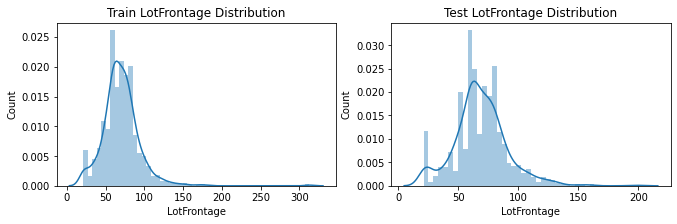

In [20]:
import seaborn as sns

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.distplot(train['LotFrontage'])
plt.title('Train LotFrontage Distribution')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(test['LotFrontage'])
plt.title('Test LotFrontage Distribution')
plt.ylabel('Count')
plt.show()

## Cleaning from Datasets ( Train + Test )

In [21]:
def dropcolumns(df, col):
    # dropping columns which has around 50 percent missing values
    
    df.drop(columns=col,inplace=True)

In [22]:
col = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
dropcolumns(train, col)

In [23]:
# col = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
dropcolumns(test, col)

In [24]:
getshape(train, test)

((1460, 76), (1459, 75))

In [25]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [26]:
# Exporting cleaned data to csv file
train.to_csv('housepricing_train_clean_10Oct2022.csv')

## Filling the missing values ( Train + Test )

In [27]:
# Make copy of data set before making minor wrangling operations as we don't want to edit our row data
train_clean = train.copy()

In [28]:
test_clean = test.copy()

In [29]:
def checkcorrelation(df, single_column):
    # Chekcing which column has most correlation with df column
    return df.corr()[single_column].nlargest(3)

In [30]:
checkcorrelation(train_clean, 'GarageYrBlt')

GarageYrBlt     1.000000
YearBuilt       0.825667
YearRemodAdd    0.642277
Name: GarageYrBlt, dtype: float64

In [31]:
# Setting pandas to disaply all rows
pd.set_option('display.max_rows', None)

# Printing first 50 records of the most correlated column with GarageYrBlt
train_clean[['GarageYrBlt','YearBuilt']][0:5]

GarageYrBlt  YearBuilt
0       2003.0       2003
1       1976.0       1976
2       2001.0       2001
3       1998.0       1915
4       2000.0       2000

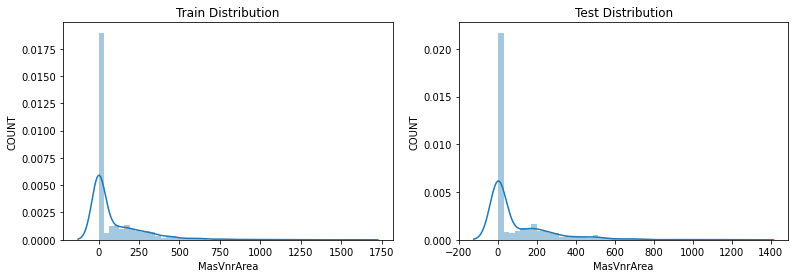

In [32]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(train_clean['MasVnrArea'])
plt.title('Train Distribution')
plt.ylabel('COUNT')

plt.subplot(1,2,2)
sns.distplot(test_clean['MasVnrArea'])
plt.title('Test Distribution')
plt.ylabel('COUNT')
plt.show()

Most value is zero, and since this column has just 8 missed record,we will fill all values with 0, As distribution is not like Gaussion distribution, we can't use mean to fill missing values

In [33]:
train_clean['Electrical'].isnull().sum(), test_clean['Electrical'].isnull().sum()

(1, 0)

In [34]:
train_clean['Electrical'].mode()[0]

'SBrkr'

In [35]:
train_clean['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [36]:
test_clean['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [37]:
train_clean['BsmtQual'].isnull().sum(), test_clean['BsmtQual'].isnull().sum()

(37, 44)

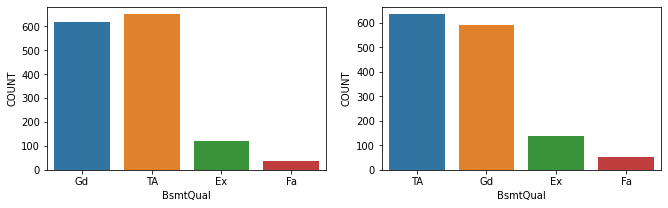

In [38]:
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.countplot(train['BsmtQual'])
plt.ylabel('COUNT')

plt.subplot(1,2,2)
sns.countplot(test['BsmtQual'])
plt.ylabel('COUNT')
plt.show()

In [39]:
test_clean['BsmtCond'].value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [40]:
train_clean['BsmtFinType1'].isnull().sum(),   test_clean['BsmtFinType1'].isnull().sum()

(37, 42)

In [41]:
train_clean['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

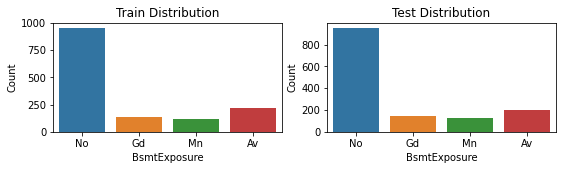

In [42]:
plt.figure(figsize=(9,2))
plt.subplot(1,2,1)
sns.countplot(train['BsmtExposure'])
plt.title('Train Distribution')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(test['BsmtExposure'])
plt.title('Test Distribution')
plt.ylabel('Count')
plt.show()

In [43]:
train_clean['BsmtFinType2'].describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

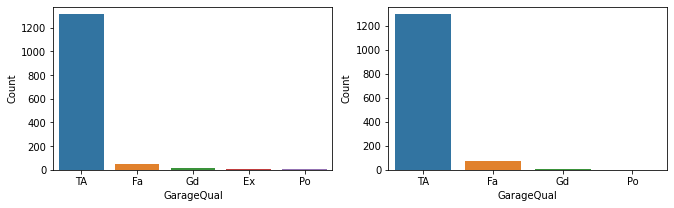

In [44]:
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.countplot(train['GarageQual'])
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(test['GarageQual'])
plt.ylabel('Count')
plt.show()

In [45]:
train_clean['GarageFinish'].value_counts(ascending=False)

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [46]:
train_clean['GarageFinish'].isnull().sum(), test_clean['GarageFinish'].isnull().sum()

(81, 78)

In [47]:
train_clean['GarageCond'].describe()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

In [48]:
train_clean['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [49]:
train_clean['GarageType'].mode()

0    Attchd
dtype: object

In [50]:
train_clean['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [51]:
train_clean

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
5        6          50       RL         85.0    14115   Pave      IR1   
6        7          20       RL         75.0    10084   Pave      Reg   
7        8          60       RL          NaN    10382   Pave      IR1   
8        9          50       RM         51.0     6120   Pave      Reg   
9       10         190       RL         50.0     7420   Pave      Reg   
10      11          20       RL         70.0    11200   Pave      Reg   
11      12          60       RL         85.0    11924   Pave      IR1   
12      13          20       RL          NaN    12968   Pave      IR2   
13      14          20       RL         91.0    10652   Pave      IR1   
14      15          20       RL          NaN    10920   Pave      IR1   
15      16          45       RM         51.0     6120   Pave      Reg   
16      17          20       RL          NaN    11241   Pave      IR1   
17      18          90       RL         72.0    10791   Pave      Reg   
18      19          20       RL         66.0    13695   Pave      Reg   
19      20          20       RL         70.0     7560   Pave      Reg   
20      21          60       RL        101.0    14215   Pave      IR1   
21      22          45       RM         57.0     7449   Pave      Reg   
22      23          20       RL         75.0     9742   Pave      Reg   
23      24         120       RM         44.0     4224   Pave      Reg   
24      25          20       RL          NaN     8246   Pave      IR1   
25      26          20       RL        110.0    14230   Pave      Reg   
26      27          20       RL         60.0     7200   Pave      Reg   
27      28          20       RL         98.0    11478   Pave      Reg   
28      29          20       RL         47.0    16321   Pave      IR1   
29      30          30       RM         60.0     6324   Pave      IR1   
30      31          70  C (all)         50.0     8500   Pave      Reg   
31      32          20       RL          NaN     8544   Pave      IR1   
32      33          20       RL         85.0    11049   Pave      Reg   
33      34          20       RL         70.0    10552   Pave      IR1   
34      35         120       RL         60.0     7313   Pave      Reg   
35      36          60       RL        108.0    13418   Pave      Reg   
36      37          20       RL        112.0    10859   Pave      Reg   
37      38          20       RL         74.0     8532   Pave      Reg   
38      39          20       RL         68.0     7922   Pave      Reg   
39      40          90       RL         65.0     6040   Pave      Reg   
40      41          20       RL         84.0     8658   Pave      Reg   
41      42          20       RL        115.0    16905   Pave      Reg   
42      43          85       RL          NaN     9180   Pave      IR1   
43      44          20       RL          NaN     9200   Pave      IR1   
44      45          20       RL         70.0     7945   Pave      Reg   
45      46         120       RL         61.0     7658   Pave      Reg   
46      47          50       RL         48.0    12822   Pave      IR1   
47      48          20       FV         84.0    11096   Pave      Reg   
48      49         190       RM         33.0     4456   Pave      Reg   
49      50          20       RL         66.0     7742   Pave      Reg   
50      51          60       RL          NaN    13869   Pave      IR2   
51      52          50       RM         52.0     6240   Pave      Reg   
52      53          90       RM        110.0     8472   Grvl      IR2   
53      54          20       RL         68.0    50271   Pave      

### As goal is - For each Id in the test set, you must predict the value of the SalePrice variable.

In [52]:
def showtestcolumns(df):
    """show the limited columns default values"""

    columns = ['MSZoning', 'BsmtFullBath', 'Utilities', 'BsmtHalfBath', 'Functional', 'GarageCars', 
           'GarageArea', 'KitchenQual', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'Exterior2nd']

    return pd.DataFrame(df, columns=columns)

In [53]:
showtestcolumns(test_clean).describe().T

count         mean         std  min    25%    50%     75%  \
BsmtFullBath  1457.0     0.434454    0.530648  0.0    0.0    0.0     1.0   
BsmtHalfBath  1457.0     0.065202    0.252468  0.0    0.0    0.0     0.0   
GarageCars    1458.0     1.766118    0.775945  0.0    1.0    2.0     2.0   
GarageArea    1458.0   472.768861  217.048611  0.0  318.0  480.0   576.0   
TotalBsmtSF   1458.0  1046.117970  442.898624  0.0  784.0  988.0  1305.0   
BsmtFinSF1    1458.0   439.203704  455.268042  0.0    0.0  350.5   753.5   
BsmtFinSF2    1458.0    52.619342  176.753926  0.0    0.0    0.0     0.0   

                 max  
BsmtFullBath     3.0  
BsmtHalfBath     2.0  
GarageCars       5.0  
GarageArea    1488.0  
TotalBsmtSF   5095.0  
BsmtFinSF1    4010.0  
BsmtFinSF2    1526.0

In [54]:
def train_dataset():
    """return the train dataset"""
    # Make copy of data set before making minor wrangling operations as we don't want to edit our row data
    train_clean = train.copy()
    
    train_clean['LotFrontage'] = train_clean['LotFrontage'].fillna(0)
    train_clean['LotFrontage'] = train_clean['LotFrontage'].replace(0,train_clean['LotFrontage'].mean())
    
    train_clean.drop('GarageYrBlt',axis=1,inplace=True)
    train_clean['MasVnrArea'].fillna(0.0,inplace=True)
    train_clean['Electrical'].fillna(train_clean['Electrical'].mode()[0],inplace=True)
    train_clean['MasVnrType'].fillna('None',inplace=True)

    # We will use 'Gd'and 'TA' almost equally to fill missed records
    train_clean['BsmtQual'].fillna('TA',limit=20,inplace=True)
    train_clean['BsmtQual'].fillna('Gd',limit=17,inplace=True)
    
    # 'TA' has most number of occurace, we will use this value to fill missed records
    train_clean['BsmtCond'].fillna('TA',inplace=True)
    
    train_clean['BsmtFinType1'].fillna('GLQ',limit=19,inplace=True)
    train_clean['BsmtFinType1'].fillna('Unf',limit=18,inplace=True)
    
    # Filling with most frequent value 'No'
    train_clean['BsmtExposure'].fillna('No',inplace=True)
    
    train_clean['BsmtFinType2'].fillna('Unf',inplace=True)
    
    # We will use TA to fill missing value as it has appeared 1311 times of
    # total 1379 records in train data, 
    # and for test data in has occured 1293 times
    train_clean['GarageQual'].fillna('TA',inplace=True)

    # Filling 51 values with 'Unf' and 30 values using 'RFn'
    train_clean['GarageFinish'].fillna('Unf',limit=51,inplace=True)
    train_clean['GarageFinish'].fillna('Rfn',limit=30,inplace=True)
    
    # 'TA' is most occuring value in both train and test data,
    # its good to use to fill missing values in both datasets
    train_clean['GarageCond'].fillna('TA',inplace=True)

    train_clean['GarageType'].fillna(train_clean['GarageType'].mode()[0],inplace=True)
    
    return train_clean

In [55]:
def test_dataset():
    """return the train dataset"""
    # Make copy of data set before making minor wrangling operations as we don't want to edit our row data
    test_clean = test.copy()
    
    test_clean['LotFrontage'] = (test_clean['LotFrontage'].fillna(0)).replace(0,test_clean['LotFrontage'].mean())
    
    test_clean.drop('GarageYrBlt',axis=1,inplace=True)
    test_clean['MasVnrArea'].fillna(0.0,inplace=True)
    test_clean['MasVnrType'].fillna('None',inplace=True)
    
    # We will use 'Gd'and 'TA' almost equally to fill missed records
    test_clean['BsmtQual'].fillna('TA',limit=24,inplace=True)
    test_clean['BsmtQual'].fillna('Gd',limit=20,inplace=True)
    
    # 'TA' has most number of occurace, we will use this value to fill missed records
    test_clean['BsmtCond'].fillna('TA',inplace=True)  
    
    test_clean['BsmtFinType1'].fillna('GLQ',limit=22,inplace=True)
    test_clean['BsmtFinType1'].fillna('Unf',limit=20,inplace=True)
    
    # Filling with most frequent value 'No'
    test_clean['BsmtExposure'].fillna('No',inplace=True)
    
    test_clean['BsmtFinType2'].fillna('Unf',inplace=True)
    
    # We will use TA to fill missing value as it has appeared 1311 times of
    # total 1379 records in train data, 
    # and for test data in has occured 1293 times
    test_clean['GarageQual'].fillna('TA',inplace=True)
    
    test_clean['GarageFinish'].fillna('Unf',limit=50,inplace=True)
    test_clean['GarageFinish'].fillna('RFn',limit=38,inplace=True)
    
    # 'TA' is most occuring value in both train and test data,
    # its good to use to fill missing values in both datasets
    test_clean['GarageCond'].fillna('TA',inplace=True)
    
    test_clean['GarageType'].fillna(test_clean['GarageType'].mode()[0],inplace=True)
    
    # drop the columns only in case of not submitting in Kaggle
    test_clean['Exterior1st'].fillna(test_clean['Exterior1st'].mode()[0],inplace=True)
    test_clean['SaleType'].fillna(test_clean['SaleType'].mode()[0],inplace=True)
    test_clean['BsmtUnfSF'].fillna(test_clean['BsmtUnfSF'].mean(),inplace=True)
    test_clean['BsmtFullBath'].fillna(test_clean['BsmtFullBath'].mean(),inplace=True)
    test_clean['BsmtHalfBath'].fillna(test_clean['BsmtHalfBath'].mean(),inplace=True)
    test_clean['GarageCars'].fillna(test_clean['GarageCars'].mean(),inplace=True)
    test_clean['GarageArea'].fillna(test_clean['GarageArea'].mean(),inplace=True)
    test_clean['TotalBsmtSF'].fillna(test_clean['TotalBsmtSF'].mean(),inplace=True)
    test_clean['BsmtFinSF1'].fillna(test_clean['BsmtFinSF1'].mean(),inplace=True)
    test_clean['BsmtFinSF2'].fillna(test_clean['BsmtFinSF2'].mean(),inplace=True)
    test_clean['MSZoning'].fillna(test_clean['MSZoning'].mode()[0],inplace=True)
    test_clean['Functional'].fillna(test_clean['Functional'].mode()[0],inplace=True)
    test_clean['Utilities'].fillna(test_clean['Utilities'].mode()[0],inplace=True)
    test_clean['Exterior2nd'].fillna(test_clean['Exterior2nd'].mode()[0],inplace=True)
    test_clean['KitchenQual'].fillna(test_clean['KitchenQual'].mode()[0],inplace=True)

    return test_clean

In [56]:
train_ds = train_dataset()

In [57]:
test_ds = test_dataset()

In [58]:
train_ds

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL    65.000000     8450   Pave      Reg   
1        2          20       RL    80.000000     9600   Pave      Reg   
2        3          60       RL    68.000000    11250   Pave      IR1   
3        4          70       RL    60.000000     9550   Pave      IR1   
4        5          60       RL    84.000000    14260   Pave      IR1   
5        6          50       RL    85.000000    14115   Pave      IR1   
6        7          20       RL    75.000000    10084   Pave      Reg   
7        8          60       RL    57.623288    10382   Pave      IR1   
8        9          50       RM    51.000000     6120   Pave      Reg   
9       10         190       RL    50.000000     7420   Pave      Reg   
10      11          20       RL    70.000000    11200   Pave      Reg   
11      12          60       RL    85.000000    11924   Pave      IR1   
12      13          20       RL    57.623288    12968   Pave      IR2   
13      14          20       RL    91.000000    10652   Pave      IR1   
14      15          20       RL    57.623288    10920   Pave      IR1   
15      16          45       RM    51.000000     6120   Pave      Reg   
16      17          20       RL    57.623288    11241   Pave      IR1   
17      18          90       RL    72.000000    10791   Pave      Reg   
18      19          20       RL    66.000000    13695   Pave      Reg   
19      20          20       RL    70.000000     7560   Pave      Reg   
20      21          60       RL   101.000000    14215   Pave      IR1   
21      22          45       RM    57.000000     7449   Pave      Reg   
22      23          20       RL    75.000000     9742   Pave      Reg   
23      24         120       RM    44.000000     4224   Pave      Reg   
24      25          20       RL    57.623288     8246   Pave      IR1   
25      26          20       RL   110.000000    14230   Pave      Reg   
26      27          20       RL    60.000000     7200   Pave      Reg   
27      28          20       RL    98.000000    11478   Pave      Reg   
28      29          20       RL    47.000000    16321   Pave      IR1   
29      30          30       RM    60.000000     6324   Pave      IR1   
30      31          70  C (all)    50.000000     8500   Pave      Reg   
31      32          20       RL    57.623288     8544   Pave      IR1   
32      33          20       RL    85.000000    11049   Pave      Reg   
33      34          20       RL    70.000000    10552   Pave      IR1   
34      35         120       RL    60.000000     7313   Pave      Reg   
35      36          60       RL   108.000000    13418   Pave      Reg   
36      37          20       RL   112.000000    10859   Pave      Reg   
37      38          20       RL    74.000000     8532   Pave      Reg   
38      39          20       RL    68.000000     7922   Pave      Reg   
39      40          90       RL    65.000000     6040   Pave      Reg   
40      41          20       RL    84.000000     8658   Pave      Reg   
41      42          20       RL   115.000000    16905   Pave      Reg   
42      43          85       RL    57.623288     9180   Pave      IR1   
43      44          20       RL    57.623288     9200   Pave      IR1   
44      45          20       RL    70.000000     7945   Pave      Reg   
45      46         120       RL    61.000000     7658   Pave      Reg   
46      47          50       RL    48.000000    12822   Pave      IR1   
47      48          20       FV    84.000000    11096   Pave      Reg   
48      49         190       RM    33.000000     4456   Pave      Reg   
49      50          20       RL    66.000000     7742   Pave      Reg   
50      51          60       RL    57.623288    13869   Pave      IR2   
51      52          50       RM    52.000000     6240   Pave      Reg   
52      53          90       RM   110.000000     8472   Grvl      IR2   
53      54          20       RL    68.000000    50271   Pave      

In [59]:
nullvalues(train_ds)

Series([], dtype: int64)

In [60]:
nullvalues(test_ds)

Series([], dtype: int64)

In [61]:
# Now we will drop this 'Id' column from both of dataset as it doesn't possess much meaning
train_ds.drop('Id',axis=1,inplace=True)
test_ds.drop('Id',axis=1,inplace=True)

## PRE-PROCESSING
Step-1 : Drop the outcome column

Step-2 : Find all the categorial columns

Step-3 : Apply embedding for categorial column data


In [62]:
# # Selecting depending and indepent variable
# train_x=train_clean.drop('SalePrice',axis=1)
# # train_x=train_clean.drop(columns=['SalePrice'])
# train_y=train_clean['SalePrice']

x=train_ds.drop('SalePrice',axis=1)
y=train_ds['SalePrice']

In [98]:
test_ds

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             20       RH    80.000000    11622   Pave      Reg         Lvl   
1             20       RL    81.000000    14267   Pave      IR1         Lvl   
2             60       RL    74.000000    13830   Pave      IR1         Lvl   
3             60       RL    78.000000     9978   Pave      IR1         Lvl   
4            120       RL    43.000000     5005   Pave      IR1         HLS   
5             60       RL    75.000000    10000   Pave      IR1         Lvl   
6             20       RL    68.580357     7980   Pave      IR1         Lvl   
7             60       RL    63.000000     8402   Pave      IR1         Lvl   
8             20       RL    85.000000    10176   Pave      Reg         Lvl   
9             20       RL    70.000000     8400   Pave      Reg         Lvl   
10           120       RH    26.000000     5858   Pave      IR1         Lvl   
11           160       RM    21.000000     1680   Pave      Reg         Lvl   
12           160       RM    21.000000     1680   Pave      Reg         Lvl   
13           160       RL    24.000000     2280   Pave      Reg         Lvl   
14           120       RL    24.000000     2280   Pave      Reg         Lvl   
15            60       RL   102.000000    12858   Pave      IR1         Lvl   
16            20       RL    94.000000    12883   Pave      IR1         Lvl   
17            20       RL    90.000000    11520   Pave      Reg         Lvl   
18            20       RL    79.000000    14122   Pave      IR1         Lvl   
19            20       RL   110.000000    14300   Pave      Reg         HLS   
20            60       RL   105.000000    13650   Pave      Reg         Lvl   
21           120       RL    41.000000     7132   Pave      IR1         Lvl   
22            20       RL   100.000000    18494   Pave      IR1         Lvl   
23           120       RL    43.000000     3203   Pave      Reg         Lvl   
24            80       RL    67.000000    13300   Pave      IR1         Lvl   
25            60       RL    63.000000     8577   Pave      IR1         Lvl   
26            60       RL    60.000000    17433   Pave      IR2         Lvl   
27            20       RL    73.000000     8987   Pave      Reg         Lvl   
28            20       FV    92.000000     9215   Pave      Reg         Lvl   
29            20       FV    84.000000    10440   Pave      Reg         Lvl   
30            60       RL    70.000000    11920   Pave      Reg         Lvl   
31            30       RH    70.000000     9800   Pave      Reg         Lvl   
32            20       RL    39.000000    15410   Pave      IR1         Lvl   
33            60       RL    85.000000    13143   Pave      IR1         Lvl   
34            60       RL    88.000000    11134   Pave      Reg         Lvl   
35           120       FV    25.000000     4835   Pave      IR1         Lvl   
36           160       FV    39.000000     3515   Pave      Reg         Lvl   
37           160       FV    30.000000     3215   Pave      Reg         Lvl   
38           160       FV    24.000000     2544   Pave      Reg         Lvl   
39           160       FV    24.000000     2544   Pave      Reg         Lvl   
40           160       FV    68.580357     2980   Pave      Reg         Lvl   
41           160       FV    68.580357     2403   Pave      IR1         Lvl   
42            20       FV    57.000000    12853   Pave      IR1         Lvl   
43            60       FV    68.000000     7379   Pave      IR1         Lvl   
44            20       FV    80.000000     8000   Pave      Reg         Lvl   
45            20       RL    68.580357    10456   Pave      IR1         Lvl   
46            60       RL    80.000000    10791   Pave      Reg         Lvl   
47            50       RL    68.580357    18837   Pave      IR1         Lvl   
48            60       RL    80.000000     9600   Pave      Reg         Lvl   
49            20       RL    80.000000     9600   Pave  

In [63]:
# train = train_x.iloc[:train.shape[0],:]

train_val = x.values.tolist()

In [101]:
test_val = test_ds.values.tolist()

In [89]:
x

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL    65.000000     8450   Pave      Reg         Lvl   
1             20       RL    80.000000     9600   Pave      Reg         Lvl   
2             60       RL    68.000000    11250   Pave      IR1         Lvl   
3             70       RL    60.000000     9550   Pave      IR1         Lvl   
4             60       RL    84.000000    14260   Pave      IR1         Lvl   
5             50       RL    85.000000    14115   Pave      IR1         Lvl   
6             20       RL    75.000000    10084   Pave      Reg         Lvl   
7             60       RL    57.623288    10382   Pave      IR1         Lvl   
8             50       RM    51.000000     6120   Pave      Reg         Lvl   
9            190       RL    50.000000     7420   Pave      Reg         Lvl   
10            20       RL    70.000000    11200   Pave      Reg         Lvl   
11            60       RL    85.000000    11924   Pave      IR1         Lvl   
12            20       RL    57.623288    12968   Pave      IR2         Lvl   
13            20       RL    91.000000    10652   Pave      IR1         Lvl   
14            20       RL    57.623288    10920   Pave      IR1         Lvl   
15            45       RM    51.000000     6120   Pave      Reg         Lvl   
16            20       RL    57.623288    11241   Pave      IR1         Lvl   
17            90       RL    72.000000    10791   Pave      Reg         Lvl   
18            20       RL    66.000000    13695   Pave      Reg         Lvl   
19            20       RL    70.000000     7560   Pave      Reg         Lvl   
20            60       RL   101.000000    14215   Pave      IR1         Lvl   
21            45       RM    57.000000     7449   Pave      Reg         Bnk   
22            20       RL    75.000000     9742   Pave      Reg         Lvl   
23           120       RM    44.000000     4224   Pave      Reg         Lvl   
24            20       RL    57.623288     8246   Pave      IR1         Lvl   
25            20       RL   110.000000    14230   Pave      Reg         Lvl   
26            20       RL    60.000000     7200   Pave      Reg         Lvl   
27            20       RL    98.000000    11478   Pave      Reg         Lvl   
28            20       RL    47.000000    16321   Pave      IR1         Lvl   
29            30       RM    60.000000     6324   Pave      IR1         Lvl   
30            70  C (all)    50.000000     8500   Pave      Reg         Lvl   
31            20       RL    57.623288     8544   Pave      IR1         Lvl   
32            20       RL    85.000000    11049   Pave      Reg         Lvl   
33            20       RL    70.000000    10552   Pave      IR1         Lvl   
34           120       RL    60.000000     7313   Pave      Reg         Lvl   
35            60       RL   108.000000    13418   Pave      Reg         Lvl   
36            20       RL   112.000000    10859   Pave      Reg         Lvl   
37            20       RL    74.000000     8532   Pave      Reg         Lvl   
38            20       RL    68.000000     7922   Pave      Reg         Lvl   
39            90       RL    65.000000     6040   Pave      Reg         Lvl   
40            20       RL    84.000000     8658   Pave      Reg         Lvl   
41            20       RL   115.000000    16905   Pave      Reg         Lvl   
42            85       RL    57.623288     9180   Pave      IR1         Lvl   
43            20       RL    57.623288     9200   Pave      IR1         Lvl   
44            20       RL    70.000000     7945   Pave      Reg         Lvl   
45           120       RL    61.000000     7658   Pave      Reg         Lvl   
46            50       RL    48.000000    12822   Pave      IR1         Lvl   
47            20       FV    84.000000    11096   Pave      Reg         Lvl   
48           190       RM    33.000000     4456   Pave      Reg         Lvl   
49            20       RL    66.000000     7742   Pave  

In [81]:
train_val

[[60,
  'RL',
  65.0,
  8450,
  'Pave',
  'Reg',
  'Lvl',
  'AllPub',
  'Inside',
  'Gtl',
  'CollgCr',
  'Norm',
  'Norm',
  '1Fam',
  '2Story',
  7,
  5,
  2003,
  2003,
  'Gable',
  'CompShg',
  'VinylSd',
  'VinylSd',
  'BrkFace',
  196.0,
  'Gd',
  'TA',
  'PConc',
  'Gd',
  'TA',
  'No',
  'GLQ',
  706,
  'Unf',
  0,
  150,
  856,
  'GasA',
  'Ex',
  'Y',
  'SBrkr',
  856,
  854,
  0,
  1710,
  1,
  0,
  2,
  1,
  3,
  1,
  'Gd',
  8,
  'Typ',
  0,
  'Attchd',
  'RFn',
  2,
  548,
  'TA',
  'TA',
  'Y',
  0,
  61,
  0,
  0,
  0,
  0,
  0,
  2,
  2008,
  'WD',
  'Normal'],
 [20,
  'RL',
  80.0,
  9600,
  'Pave',
  'Reg',
  'Lvl',
  'AllPub',
  'FR2',
  'Gtl',
  'Veenker',
  'Feedr',
  'Norm',
  '1Fam',
  '1Story',
  6,
  8,
  1976,
  1976,
  'Gable',
  'CompShg',
  'MetalSd',
  'MetalSd',
  'None',
  0.0,
  'TA',
  'TA',
  'CBlock',
  'Gd',
  'TA',
  'Gd',
  'ALQ',
  978,
  'Unf',
  0,
  284,
  1262,
  'GasA',
  'Ex',
  'Y',
  'SBrkr',
  1262,
  0,
  0,
  1262,
  0,
  1,
  2,
  0,

In [76]:
def transform_common_data(df):
    """transforming categorial data into numerical data"""
    all_distinct_ids =[]
    
    lotconfig_id=df['LotConfig'].values.tolist()
    lotconfig_ids= list(set(lotconfig_id))
    lotconfig_ids = list(map(lambda x:"lcid_"+str(x) , lotconfig_ids))
    enum_lotconfig_ids = [ {x:i} for i,x in enumerate(lotconfig_ids)]
    lotconfig_val_id = {k: v for d in enum_lotconfig_ids for k, v in d.items()}
    lotconfig_id_val = {v: k for d in enum_lotconfig_ids for k, v in d.items()}
    
    landslope_id=df['LandSlope'].values.tolist()
    landslope_ids= list(set(landslope_id))
    landslope_ids = list(map(lambda x:"lsid_"+str(x) , landslope_ids))
    enum_landslope_ids = [ {x:i} for i,x in enumerate(landslope_ids)]
    landslope_val_id = {k: v for d in enum_landslope_ids for k, v in d.items()}
    landslope_id_val = {v: k for d in enum_landslope_ids for k, v in d.items()}
    
    neighborhood_id=df['Neighborhood'].values.tolist()
    neighborhood_ids= list(set(neighborhood_id))
    neighborhood_ids = list(map(lambda x:"neiid_"+str(x) , neighborhood_ids))
    enum_neighborhood_ids = [ {x:i} for i,x in enumerate(neighborhood_ids)]
    neighborhood_val_id = {k: v for d in enum_neighborhood_ids for k, v in d.items()}
    neighborhood_id_val = {v: k for d in enum_neighborhood_ids for k, v in d.items()}
    
    condition1_id=df['Condition1'].values.tolist()
    condition1_ids= list(set(condition1_id))
    condition1_ids = list(map(lambda x:"cond1id_"+str(x) , condition1_ids))
    enum_condition1_ids = [ {x:i} for i,x in enumerate(condition1_ids)]
    condition1_val_id = {k: v for d in enum_condition1_ids for k, v in d.items()}
    condition1_id_val = {v: k for d in enum_condition1_ids for k, v in d.items()}
    
    condition2_id=df['Condition2'].values.tolist()
    condition2_ids= list(set(condition2_id))
    condition2_ids = list(map(lambda x:"cond2id_"+str(x) , condition2_ids))
    enum_condition2_ids = [ {x:i} for i,x in enumerate(condition2_ids)]
    condition2_val_id = {k: v for d in enum_condition2_ids for k, v in d.items()}
    condition2_id_val = {v: k for d in enum_condition2_ids for k, v in d.items()}
    
    bldgtype_id=df['BldgType'].values.tolist()
    bldgtype_ids= list(set(bldgtype_id))
    bldgtype_ids = list(map(lambda x:"btyid_"+str(x) , bldgtype_ids))
    enum_bldgtype_ids = [ {x:i} for i,x in enumerate(bldgtype_ids)]
    bldgtype_val_id = {k: v for d in enum_bldgtype_ids for k, v in d.items()}
    bldgtype_id_val = {v: k for d in enum_bldgtype_ids for k, v in d.items()}
    
    housestyle_id=df['HouseStyle'].values.tolist()
    housestyle_ids= list(set(housestyle_id))
    housestyle_ids = list(map(lambda x:"hstid_"+str(x) , housestyle_ids))
    enum_housestyle_ids = [ {x:i} for i,x in enumerate(housestyle_ids)]
    housestyle_val_id = {k: v for d in enum_housestyle_ids for k, v in d.items()}
    housestyle_id_val = {v: k for d in enum_housestyle_ids for k, v in d.items()}
    
    roofstyle_id=df['RoofStyle'].values.tolist()
    roofstyle_ids= list(set(roofstyle_id))
    roofstyle_ids = list(map(lambda x:"rfstid_"+str(x) , roofstyle_ids))
    enum_roofstyle_ids = [ {x:i} for i,x in enumerate(roofstyle_ids)]
    roofstyle_val_id = {k: v for d in enum_roofstyle_ids for k, v in d.items()}
    roofstyle_id_val = {v: k for d in enum_roofstyle_ids for k, v in d.items()}
    
    roofmatl_id=df['RoofMatl'].values.tolist()
    roofmatl_ids= list(set(roofmatl_id))
    roofmatl_ids = list(map(lambda x:"rfmat1id_"+str(x) , roofmatl_ids))
    enum_roofmatl_ids = [ {x:i} for i,x in enumerate(roofmatl_ids)]
    roofmatl_val_id = {k: v for d in enum_roofmatl_ids for k, v in d.items()}
    roofmatl_id_val = {v: k for d in enum_roofmatl_ids for k, v in d.items()}
    
    exterior1st_id=df['Exterior1st'].values.tolist()
    exterior1st_ids= list(set(exterior1st_id))
    exterior1st_ids = list(map(lambda x:"ext1stid_"+str(x) , exterior1st_ids))
    enum_exterior1st_ids = [ {x:i} for i,x in enumerate(exterior1st_ids)]
    exterior1st_val_id = {k: v for d in enum_exterior1st_ids for k, v in d.items()}
    exterior1st_id_val = {v: k for d in enum_exterior1st_ids for k, v in d.items()}
    
    exterior2nd_id=df['Exterior2nd'].values.tolist()
    exterior2nd_ids= list(set(exterior2nd_id))
    exterior2nd_ids = list(map(lambda x:"ext2ndid_"+str(x) , exterior2nd_ids))
    enum_exterior2nd_ids = [ {x:i} for i,x in enumerate(exterior2nd_ids)]
    exterior2nd_val_id = {k: v for d in enum_exterior2nd_ids for k, v in d.items()}
    exterior2nd_id_val = {v: k for d in enum_exterior2nd_ids for k, v in d.items()}
    
    masvnrtype_id=df['MasVnrType'].values.tolist()
    masvnrtype_ids= list(set(masvnrtype_id))
    masvnrtype_ids = list(map(lambda x:"mvtyid_"+str(x) , masvnrtype_ids))
    enum_masvnrtype_ids = [ {x:i} for i,x in enumerate(masvnrtype_ids)]
    masvnrtype_val_id = {k: v for d in enum_masvnrtype_ids for k, v in d.items()}
    masvnrtype_id_val = {v: k for d in enum_masvnrtype_ids for k, v in d.items()}
    
    exterqual_id=df['ExterQual'].values.tolist()
    exterqual_ids= list(set(exterqual_id))
    exterqual_ids = list(map(lambda x:"extqualid_"+str(x) , exterqual_ids))
    enum_exterqual_ids = [ {x:i} for i,x in enumerate(exterqual_ids)]
    exterqual_val_id = {k: v for d in enum_exterqual_ids for k, v in d.items()}
    exterqual_id_val = {v: k for d in enum_exterqual_ids for k, v in d.items()}
    
    centralair_id=df['CentralAir'].values.tolist()
    centralair_ids= list(set(centralair_id))
    centralair_ids = list(map(lambda x:"cairid_"+str(x) , centralair_ids))
    enum_centralair_ids = [ {x:i} for i,x in enumerate(centralair_ids)]
    centralair_val_id = {k: v for d in enum_centralair_ids for k, v in d.items()}
    centralair_id_val = {v: k for d in enum_centralair_ids for k, v in d.items()}
    
    heatingqc_id=df['HeatingQC'].values.tolist()
    heatingqc_ids= list(set(heatingqc_id))
    heatingqc_ids = list(map(lambda x:"hqcid_"+str(x) , heatingqc_ids))
    enum_heatingqc_ids = [ {x:i} for i,x in enumerate(heatingqc_ids)]
    heatingqc_val_id = {k: v for d in enum_heatingqc_ids for k, v in d.items()}
    heatingqc_id_val = {v: k for d in enum_heatingqc_ids for k, v in d.items()}
    
    heating_id=df['Heating'].values.tolist()
    heating_ids= list(set(heating_id))
    heating_ids = list(map(lambda x:"htid_"+str(x) , heating_ids))
    enum_heating_ids = [ {x:i} for i,x in enumerate(heating_ids)]
    heating_val_id = {k: v for d in enum_heating_ids for k, v in d.items()}
    heating_id_val = {v: k for d in enum_heating_ids for k, v in d.items()}
    
    bsmtfintype2_id=df['BsmtFinType2'].values.tolist()
    bsmtfintype2_ids= list(set(bsmtfintype2_id))
    bsmtfintype2_ids = list(map(lambda x:"bsft2id_"+str(x) , bsmtfintype2_ids))
    enum_bsmtfintype2_ids = [ {x:i} for i,x in enumerate(bsmtfintype2_ids)]
    bsmtfintype2_val_id = {k: v for d in enum_bsmtfintype2_ids for k, v in d.items()}
    bsmtfintype2_id_val = {v: k for d in enum_bsmtfintype2_ids for k, v in d.items()}
    
    bsmtfintype1_id=df['BsmtFinType1'].values.tolist()
    bsmtfintype1_ids= list(set(bsmtfintype1_id))
    bsmtfintype1_ids = list(map(lambda x:"bsft1id_"+str(x) , bsmtfintype1_ids))
    enum_bsmtfintype1_ids = [ {x:i} for i,x in enumerate(bsmtfintype1_ids)]
    bsmtfintype1_val_id = {k: v for d in enum_bsmtfintype1_ids for k, v in d.items()}
    bsmtfintype1_id_val = {v: k for d in enum_bsmtfintype1_ids for k, v in d.items()}
    
    bsmtexposure_id=df['BsmtExposure'].values.tolist()
    bsmtexposure_ids= list(set(bsmtexposure_id))
    bsmtexposure_ids = list(map(lambda x:"bexpid_"+str(x) , bsmtexposure_ids))
    enum_bsmtexposure_ids = [ {x:i} for i,x in enumerate(bsmtexposure_ids)]
    bsmtexposure_val_id = {k: v for d in enum_bsmtexposure_ids for k, v in d.items()}
    bsmtexposure_id_val = {v: k for d in enum_bsmtexposure_ids for k, v in d.items()}
    
    bsmtcond_id=df['BsmtCond'].values.tolist()
    bsmtcond_ids= list(set(bsmtcond_id))
    bsmtcond_ids = list(map(lambda x:"bscondid_"+str(x) , bsmtcond_ids))
    enum_bsmtcond_ids = [ {x:i} for i,x in enumerate(bsmtcond_ids)]
    bsmtcond_val_id = {k: v for d in enum_bsmtcond_ids for k, v in d.items()}
    bsmtcond_id_val = {v: k for d in enum_bsmtcond_ids for k, v in d.items()}
    
    bsmtqual_id=df['BsmtQual'].values.tolist()
    bsmtqual_ids= list(set(bsmtqual_id))
    bsmtqual_ids = list(map(lambda x:"bmqlid_"+str(x) , bsmtqual_ids))
    enum_bsmtqual_ids = [ {x:i} for i,x in enumerate(bsmtqual_ids)]
    bsmtqual_val_id = {k: v for d in enum_bsmtqual_ids for k, v in d.items()}
    bsmtqual_id_val = {v: k for d in enum_bsmtqual_ids for k, v in d.items()}
    
    foundation_id=df['Foundation'].values.tolist()
    foundation_ids= list(set(foundation_id))
    foundation_ids = list(map(lambda x:"foundid_"+str(x) , foundation_ids))
    enum_foundation_ids = [ {x:i} for i,x in enumerate(foundation_ids)]
    foundation_val_id = {k: v for d in enum_foundation_ids for k, v in d.items()}
    foundation_id_val = {v: k for d in enum_foundation_ids for k, v in d.items()}
    
    extercond_id=df['ExterCond'].values.tolist()
    extercond_ids= list(set(extercond_id))
    extercond_ids = list(map(lambda x:"extcondid_"+str(x) , extercond_ids))
    enum_extercond_ids = [ {x:i} for i,x in enumerate(extercond_ids)]
    extercond_val_id = {k: v for d in enum_extercond_ids for k, v in d.items()}
    extercond_id_val = {v: k for d in enum_extercond_ids for k, v in d.items()}
    
    garagequal_id=df['GarageQual'].values.tolist()
    garagequal_ids= list(set(garagequal_id))
    garagequal_ids = list(map(lambda x:"gqlid_"+str(x) , garagequal_ids))
    enum_garagequal_ids = [ {x:i} for i,x in enumerate(garagequal_ids)]
    garagequal_val_id = {k: v for d in enum_garagequal_ids for k, v in d.items()}
    garagequal_id_val = {v: k for d in enum_garagequal_ids for k, v in d.items()}
    
    garagefinish_id=df['GarageFinish'].values.tolist()
    garagefinish_ids= list(set(garagefinish_id))
    garagefinish_ids = list(map(lambda x:"gfnshid_"+str(x) , garagefinish_ids))
    enum_garagefinish_ids = [ {x:i} for i,x in enumerate(garagefinish_ids)]
    garagefinish_val_id = {k: v for d in enum_garagefinish_ids for k, v in d.items()}
    garagefinish_id_val = {v: k for d in enum_garagefinish_ids for k, v in d.items()}
    
    garagetype_id=df['GarageType'].values.tolist()
    garagetype_ids= list(set(garagetype_id))
    garagetype_ids = list(map(lambda x:"gatypid_"+str(x) , garagetype_ids))
    enum_garagetype_ids = [ {x:i} for i,x in enumerate(garagetype_ids)]
    garagetype_val_id = {k: v for d in enum_garagetype_ids for k, v in d.items()}
    garagetype_id_val = {v: k for d in enum_garagetype_ids for k, v in d.items()}
    
    functional_id=df['Functional'].values.tolist()
    functional_ids= list(set(functional_id))
    functional_ids = list(map(lambda x:"functid_"+str(x) , functional_ids))
    enum_functional_ids = [ {x:i} for i,x in enumerate(functional_ids)]
    functional_val_id = {k: v for d in enum_functional_ids for k, v in d.items()}
    functional_id_val = {v: k for d in enum_functional_ids for k, v in d.items()}
    
    kitchenqual_id=df['KitchenQual'].values.tolist()
    kitchenqual_ids= list(set(kitchenqual_id))
    kitchenqual_ids = list(map(lambda x:"kchqlid_"+str(x) , kitchenqual_ids))
    enum_kitchenqual_ids = [ {x:i} for i,x in enumerate(kitchenqual_ids)]
    kitchenqual_val_id = {k: v for d in enum_kitchenqual_ids for k, v in d.items()}
    kitchenqual_id_val = {v: k for d in enum_kitchenqual_ids for k, v in d.items()}
    
    electrical_id=df['Electrical'].values.tolist()
    electrical_ids= list(set(electrical_id))
    electrical_ids = list(map(lambda x:"elecid_"+str(x) , electrical_ids))
    enum_electrical_ids = [ {x:i} for i,x in enumerate(electrical_ids)]
    electrical_val_id = {k: v for d in enum_electrical_ids for k, v in d.items()}
    electrical_id_val = {v: k for d in enum_electrical_ids for k, v in d.items()}
    
    salecondition_id=df['SaleCondition'].values.tolist()
    salecondition_ids= list(set(salecondition_id))
    salecondition_ids = list(map(lambda x:"sacondid_"+str(x) , salecondition_ids))
    enum_salecondition_ids = [ {x:i} for i,x in enumerate(salecondition_ids)]
    salecondition_val_id = {k: v for d in enum_salecondition_ids for k, v in d.items()}
    salecondition_id_val = {v: k for d in enum_salecondition_ids for k, v in d.items()}
    
    saletype_id=df['SaleType'].values.tolist()
    saletype_ids= list(set(saletype_id))
    saletype_ids = list(map(lambda x:"satyid_"+str(x) , saletype_ids))
    enum_saletype_ids = [ {x:i} for i,x in enumerate(saletype_ids)]
    saletype_val_id = {k: v for d in enum_saletype_ids for k, v in d.items()}
    saletype_id_val = {v: k for d in enum_saletype_ids for k, v in d.items()}
    
    paveddrive_id=df['PavedDrive'].values.tolist()
    paveddrive_ids= list(set(paveddrive_id))
    paveddrive_ids = list(map(lambda x:"pavdrid_"+str(x) , paveddrive_ids))
    enum_paveddrive_ids = [ {x:i} for i,x in enumerate(paveddrive_ids)]
    paveddrive_val_id = {k: v for d in enum_paveddrive_ids for k, v in d.items()}
    paveddrive_id_val = {v: k for d in enum_paveddrive_ids for k, v in d.items()}
    
    garagecond_id=df['GarageCond'].values.tolist()
    garagecond_ids= list(set(garagecond_id))
    garagecond_ids = list(map(lambda x:"grgcondid_"+str(x) , garagecond_ids))
    enum_garagecond_ids = [ {x:i} for i,x in enumerate(garagecond_ids)]
    garagecond_val_id = {k: v for d in enum_garagecond_ids for k, v in d.items()}
    garagecond_id_val = {v: k for d in enum_garagecond_ids for k, v in d.items()}
    
    mszoning_id=df['MSZoning'].values.tolist()
    mszoning_ids= list(set(mszoning_id))
    mszoning_ids = list(map(lambda x:"mszid_"+str(x) , mszoning_ids))
    enum_mszoning_ids = [ {x:i} for i,x in enumerate(mszoning_ids)]
    mszoning_val_id = {k: v for d in enum_mszoning_ids for k, v in d.items()}
    mszoning_id_val = {v: k for d in enum_mszoning_ids for k, v in d.items()}
    
    street_id=df['Street'].values.tolist()
    street_ids= list(set(street_id))
    street_ids = list(map(lambda x:"strtid_"+str(x) , street_ids))
    enum_street_ids = [ {x:i} for i,x in enumerate(street_ids)]
    street_val_id = {k: v for d in enum_street_ids for k, v in d.items()}
    street_id_val = {v: k for d in enum_street_ids for k, v in d.items()}
    
    lotshape_id=df['LotShape'].values.tolist()
    lotshape_ids= list(set(lotshape_id))
    lotshape_ids = list(map(lambda x:"ltshpid_"+str(x) , lotshape_ids))
    enum_lotshape_ids = [ {x:i} for i,x in enumerate(lotshape_ids)]
    lotshape_val_id = {k: v for d in enum_lotshape_ids for k, v in d.items()}
    lotshape_id_val = {v: k for d in enum_lotshape_ids for k, v in d.items()}
    
    landcontour_id=df['LandContour'].values.tolist()
    landcontour_ids= list(set(landcontour_id))
    landcontour_ids = list(map(lambda x:"lcntrid_"+str(x) , landcontour_ids))
    enum_landcontour_ids = [ {x:i} for i,x in enumerate(landcontour_ids)]
    landcontour_val_id = {k: v for d in enum_landcontour_ids for k, v in d.items()}
    landcontour_id_val = {v: k for d in enum_landcontour_ids for k, v in d.items()}
    
    utilities_id=df['Utilities'].values.tolist()
    utilities_ids= list(set(utilities_id))
    utilities_ids = list(map(lambda x:"utlid_"+str(x) , utilities_ids))
    enum_utilities_ids = [ {x:i} for i,x in enumerate(utilities_ids)]
    utilities_val_id = {k: v for d in enum_utilities_ids for k, v in d.items()}
    utilities_id_val = {v: k for d in enum_utilities_ids for k, v in d.items()}

    mssubclass=df['MSSubClass'].values.tolist()
    lotfrontage=df['LotFrontage'].values.tolist()
    lotarea=df['LotArea'].values.tolist()
    overallqual=df['OverallQual'].values.tolist()
    overallcond=df['OverallCond'].values.tolist()
    yearbuilt=df['YearBuilt'].values.tolist()
    yearremodadd=df['YearRemodAdd'].values.tolist()
    masvnrarea=df['MasVnrArea'].values.tolist()
    bsmtfinsf1=df['BsmtFinSF1'].values.tolist()
    bsmtfinsf2=df['BsmtFinSF2'].values.tolist()
    bsmtunfsf=df['BsmtUnfSF'].values.tolist()
    totalbsmtsf=df['TotalBsmtSF'].values.tolist()
    firstflrsf=df['1stFlrSF'].values.tolist()
    sndflrsf=df['2ndFlrSF'].values.tolist()
    lowqualfinsf=df['LowQualFinSF'].values.tolist()
    grlivarea=df['GrLivArea'].values.tolist()
    bsmtfullbath=df['BsmtFullBath'].values.tolist()
    bsmthalfbath=df['BsmtHalfBath'].values.tolist()
    fullbath=df['FullBath'].values.tolist()
    halfbath=df['HalfBath'].values.tolist()
    bedroomabvgr=df['BedroomAbvGr'].values.tolist()
    kitchenabvgr=df['KitchenAbvGr'].values.tolist()
    totrmsabvgrd=df['TotRmsAbvGrd'].values.tolist()
    fireplaces=df['Fireplaces'].values.tolist()
    garagecars=df['GarageCars'].values.tolist()
    garagearea=df['GarageArea'].values.tolist()
    wooddecksf=df['WoodDeckSF'].values.tolist()
    openporchsf=df['OpenPorchSF'].values.tolist()
    enclosedporch=df['EnclosedPorch'].values.tolist()
    threessnporch=df['3SsnPorch'].values.tolist()
    screenporch=df['ScreenPorch'].values.tolist()
    poolarea=df['PoolArea'].values.tolist()
    miscval=df['MiscVal'].values.tolist()
    mosold=df['MoSold'].values.tolist()
    yrsold=df['YrSold'].values.tolist()
    
    all_distinct_ids.extend(mszoning_ids)
    all_distinct_ids.extend(street_ids)
    all_distinct_ids.extend(lotshape_ids)
    all_distinct_ids.extend(landcontour_ids)
    all_distinct_ids.extend(utilities_ids)
    all_distinct_ids.extend(lotconfig_ids)
    all_distinct_ids.extend(landslope_ids)
    all_distinct_ids.extend(neighborhood_ids)
    all_distinct_ids.extend(condition1_ids)
    all_distinct_ids.extend(condition2_ids)
    all_distinct_ids.extend(bldgtype_ids)
    all_distinct_ids.extend(housestyle_ids)
    all_distinct_ids.extend(roofstyle_ids)
    all_distinct_ids.extend(roofmatl_ids)
    all_distinct_ids.extend(exterior1st_ids)
    all_distinct_ids.extend(exterior2nd_ids)
    all_distinct_ids.extend(masvnrtype_ids)
    all_distinct_ids.extend(exterqual_ids)
    all_distinct_ids.extend(centralair_ids)
    all_distinct_ids.extend(heatingqc_ids)
    all_distinct_ids.extend(heating_ids)
    all_distinct_ids.extend(bsmtfintype2_ids)
    all_distinct_ids.extend(bsmtfintype1_ids)
    all_distinct_ids.extend(bsmtexposure_ids)
    all_distinct_ids.extend(bsmtcond_ids)
    all_distinct_ids.extend(bsmtqual_ids)
    all_distinct_ids.extend(foundation_ids)
    all_distinct_ids.extend(extercond_ids)
    all_distinct_ids.extend(garagequal_ids)
    all_distinct_ids.extend(garagefinish_ids)
    all_distinct_ids.extend(garagetype_ids)
    all_distinct_ids.extend(functional_ids)
    all_distinct_ids.extend(kitchenqual_ids)
    all_distinct_ids.extend(electrical_ids)
    all_distinct_ids.extend(salecondition_ids)
    all_distinct_ids.extend(saletype_ids)
    all_distinct_ids.extend(paveddrive_ids)
    all_distinct_ids.extend(garagecond_ids)
    
    enum_all_ids = [ {x:i} for i,x in enumerate(all_distinct_ids)]
    val_id = {k: v for d in enum_all_ids for k, v in d.items()}
    id_val = {v: k for d in enum_all_ids for k, v in d.items()}
    
    return val_id,id_val
    

In [77]:
val_id,id_val =transform_common_data(x)

In [100]:
val_id_1,id_val_1 =transform_common_data(test_ds)

In [79]:
val_id

{'mszid_FV': 0,
 'mszid_C (all)': 1,
 'mszid_RH': 2,
 'mszid_RL': 3,
 'mszid_RM': 4,
 'strtid_Pave': 5,
 'strtid_Grvl': 6,
 'ltshpid_Reg': 7,
 'ltshpid_IR3': 8,
 'ltshpid_IR2': 9,
 'ltshpid_IR1': 10,
 'lcntrid_Low': 11,
 'lcntrid_HLS': 12,
 'lcntrid_Bnk': 13,
 'lcntrid_Lvl': 14,
 'utlid_NoSeWa': 15,
 'utlid_AllPub': 16,
 'lcid_Corner': 17,
 'lcid_Inside': 18,
 'lcid_FR2': 19,
 'lcid_CulDSac': 20,
 'lcid_FR3': 21,
 'lsid_Gtl': 22,
 'lsid_Mod': 23,
 'lsid_Sev': 24,
 'neiid_NAmes': 25,
 'neiid_MeadowV': 26,
 'neiid_Veenker': 27,
 'neiid_StoneBr': 28,
 'neiid_Crawfor': 29,
 'neiid_SWISU': 30,
 'neiid_IDOTRR': 31,
 'neiid_BrkSide': 32,
 'neiid_OldTown': 33,
 'neiid_BrDale': 34,
 'neiid_NWAmes': 35,
 'neiid_ClearCr': 36,
 'neiid_Mitchel': 37,
 'neiid_SawyerW': 38,
 'neiid_Edwards': 39,
 'neiid_Sawyer': 40,
 'neiid_NoRidge': 41,
 'neiid_CollgCr': 42,
 'neiid_Blueste': 43,
 'neiid_Gilbert': 44,
 'neiid_NridgHt': 45,
 'neiid_Somerst': 46,
 'neiid_Timber': 47,
 'neiid_NPkVill': 48,
 'neiid_Blmng

In [80]:
id_val

{0: 'mszid_FV',
 1: 'mszid_C (all)',
 2: 'mszid_RH',
 3: 'mszid_RL',
 4: 'mszid_RM',
 5: 'strtid_Pave',
 6: 'strtid_Grvl',
 7: 'ltshpid_Reg',
 8: 'ltshpid_IR3',
 9: 'ltshpid_IR2',
 10: 'ltshpid_IR1',
 11: 'lcntrid_Low',
 12: 'lcntrid_HLS',
 13: 'lcntrid_Bnk',
 14: 'lcntrid_Lvl',
 15: 'utlid_NoSeWa',
 16: 'utlid_AllPub',
 17: 'lcid_Corner',
 18: 'lcid_Inside',
 19: 'lcid_FR2',
 20: 'lcid_CulDSac',
 21: 'lcid_FR3',
 22: 'lsid_Gtl',
 23: 'lsid_Mod',
 24: 'lsid_Sev',
 25: 'neiid_NAmes',
 26: 'neiid_MeadowV',
 27: 'neiid_Veenker',
 28: 'neiid_StoneBr',
 29: 'neiid_Crawfor',
 30: 'neiid_SWISU',
 31: 'neiid_IDOTRR',
 32: 'neiid_BrkSide',
 33: 'neiid_OldTown',
 34: 'neiid_BrDale',
 35: 'neiid_NWAmes',
 36: 'neiid_ClearCr',
 37: 'neiid_Mitchel',
 38: 'neiid_SawyerW',
 39: 'neiid_Edwards',
 40: 'neiid_Sawyer',
 41: 'neiid_NoRidge',
 42: 'neiid_CollgCr',
 43: 'neiid_Blueste',
 44: 'neiid_Gilbert',
 45: 'neiid_NridgHt',
 46: 'neiid_Somerst',
 47: 'neiid_Timber',
 48: 'neiid_NPkVill',
 49: 'neiid_B

In [90]:
train_id_df =list(map(lambda x:[x[0],val_id.get("mszid_"+str(x[1])),x[2],x[3],val_id.get("strtid_"+str(x[4])),val_id.get("ltshpid_"+str(x[5])),val_id.get("lcntrid_"+str(x[6])),val_id.get("utlid_"+str(x[7])),val_id.get("lcid_"+str(x[8])),val_id.get("lsid_"+str(x[9])),val_id.get("neiid_"+str(x[10])),val_id.get("cond1id_"+str(x[11])),val_id.get("cond2id_"+str(x[12])),val_id.get("btyid_"+str(x[13])),val_id.get("hstid_"+str(x[14])),x[15],x[16],x[17],x[18],val_id.get("rfstid_"+str(x[19])),val_id.get("rfmat1id_"+str(x[20])),val_id.get("ext1stid_"+str(x[21])),val_id.get("ext2ndid_"+str(x[22])),val_id.get("mvtyid_"+str(x[23])),x[24],val_id.get("extqualid_"+str(x[25])),val_id.get("extcondid_"+str(x[26])),val_id.get("foundid_"+str(x[27])),val_id.get("bmqlid_"+str(x[28])),val_id.get("bscondid_"+str(x[29])),val_id.get("bexpid_"+str(x[30])),val_id.get("bsft1id_"+str(x[31])),x[32],val_id.get("bsft2id_"+str(x[33])),x[34],x[35],x[36],val_id.get("htid_"+str(x[37])),val_id.get("hqcid_"+str(x[38])),val_id.get("cairid_"+str(x[39])),val_id.get("elecid_"+str(x[40])),x[41],x[42],x[43],x[44],x[45],x[46],x[47],x[48],x[49],x[50],val_id.get("kchqlid_"+str(x[51])),x[52],val_id.get("functid_"+str(x[53])),x[54],val_id.get("gatypid_"+str(x[55])),val_id.get("gfnshid_"+str(x[56])),x[57],x[58],val_id.get("gqlid_"+str(x[59])),val_id.get("grgcondid_"+str(x[60])),val_id.get("pavdrid_"+str(x[61])),x[62],x[63],x[64],x[65],x[66],x[67],x[68],x[69],x[70],val_id.get("satyid_"+str(x[71])),val_id.get("sacondid_"+str(x[72]))],train_val))

In [102]:
test_id_df =list(map(lambda x:[x[0],val_id_1.get("mszid_"+str(x[1])),x[2],x[3],val_id_1.get("strtid_"+str(x[4])),val_id_1.get("ltshpid_"+str(x[5])),val_id_1.get("lcntrid_"+str(x[6])),val_id_1.get("utlid_"+str(x[7])),val_id_1.get("lcid_"+str(x[8])),val_id_1.get("lsid_"+str(x[9])),val_id_1.get("neiid_"+str(x[10])),val_id_1.get("cond1id_"+str(x[11])),val_id_1.get("cond2id_"+str(x[12])),val_id_1.get("btyid_"+str(x[13])),val_id_1.get("hstid_"+str(x[14])),x[15],x[16],x[17],x[18],val_id_1.get("rfstid_"+str(x[19])),val_id_1.get("rfmat1id_"+str(x[20])),val_id_1.get("ext1stid_"+str(x[21])),val_id_1.get("ext2ndid_"+str(x[22])),val_id_1.get("mvtyid_"+str(x[23])),x[24],val_id_1.get("extqualid_"+str(x[25])),val_id_1.get("extcondid_"+str(x[26])),val_id_1.get("foundid_"+str(x[27])),val_id_1.get("bmqlid_"+str(x[28])),val_id_1.get("bscondid_"+str(x[29])),val_id_1.get("bexpid_"+str(x[30])),val_id_1.get("bsft1id_"+str(x[31])),x[32],val_id_1.get("bsft2id_"+str(x[33])),x[34],x[35],x[36],val_id_1.get("htid_"+str(x[37])),val_id_1.get("hqcid_"+str(x[38])),val_id_1.get("cairid_"+str(x[39])),val_id_1.get("elecid_"+str(x[40])),x[41],x[42],x[43],x[44],x[45],x[46],x[47],x[48],x[49],x[50],val_id_1.get("kchqlid_"+str(x[51])),x[52],val_id_1.get("functid_"+str(x[53])),x[54],val_id_1.get("gatypid_"+str(x[55])),val_id_1.get("gfnshid_"+str(x[56])),x[57],x[58],val_id_1.get("gqlid_"+str(x[59])),val_id_1.get("grgcondid_"+str(x[60])),val_id_1.get("pavdrid_"+str(x[61])),x[62],x[63],x[64],x[65],x[66],x[67],x[68],x[69],x[70],val_id_1.get("satyid_"+str(x[71])),val_id_1.get("sacondid_"+str(x[72]))],test_val))

In [92]:
train_np=np.array(train_id_df,dtype=np.float64)

In [103]:
test_np=np.array(test_id_df,dtype=np.float64)

## Modelling

Step-1 : 

Step-2 : 

Step-3 : 


In [93]:
# Importing basic library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,VotingRegressor
# from xgboost import XGBRFRegressor

# Metrics to evaluate the model
from sklearn.metrics import mean_squared_error as mse

In [104]:
# Linear Regression
lr=LinearRegression()
lr.fit(train_np,y)

ypred_lr=lr.predict(test_np)

lr.score(train_np,y)

0.8398445852778427

In [105]:
# Random forest model
model_rf=RandomForestRegressor(n_estimators=500)
model_rf.fit(train_np,y)

ypred_rf=model_rf.predict(test_np)

print('Training Score of RF: ',model_rf.score(train_np,y))

Training Score of RF:  0.981989102022554


In [106]:
# AdaAdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
model_adb=AdaBoostRegressor(n_estimators=250)
model_adb.fit(train_np,y)

ypred_adb=model_adb.predict(test_np)

model_adb.score(train_np,y)

0.8612756091834322

In [107]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(criterion='mse')
model_dt.fit(train_np,y)
ypred_dt=model_dt.predict(test_np)
model_dt.score(train_np,y)

1.0

In [108]:
# SVM
svm=SVR()
svm.fit(train_np,y)
ypred_svm=svm.predict(test_np)

svm.score(train_np,y)

-0.05047546658123947

## Submission

Step-1 : 

Step-2 : 

Step-3 : 

In [ ]:
submission=pd.DataFrame()
submission['ID']=testid
submission['SalePrice']=ypred_dt

submission.to_csv('housepred.csv')